# Семинар 1 - Первичный анализ данных, визуализация, etc. 

__Источник данных:__ [https://opendata.socrata.com/](https://opendata.socrata.com/Government/Airplane-Crashes-and-Fatalities-Since-1908/q2te-8cvq)

__Dataset:__ Airplane Crashes and Fatalities Since 1908

Содержит полную историю авиакатастроф по всему миру, с 1908 года-по настоящее время.
> `../data/Airplane_Crashes_and_Fatalities_Since_1908.csv`

## 0. Импорт библиотек

In [47]:
import pandas as pd
import numpy as np

import scipy.stats as st

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(palette='deep', style='darkgrid', rc={"figure.figsize": (15, 8)})


import warnings
warnings.simplefilter('ignore')

## 1. Чтение данных и просмотр
Воспользуйтесь функцией .read_csv()

In [48]:
df = pd.read_csv("../data/Airplane_Crashes_and_Fatalities_Since_1908.csv")


#Пока не смотрим на этот код: 
df['Time'] = df['Time'].str.replace('c:','')

- __Date__: Дата инцидента
- __Time__: Время инцидента
- __Location__: Локация инцидента
- __Operator__: Авиакомпания
- __Flight #__
- __Route__
- __Type__: Тип разбившегося самолета 
- __Registration__:
- __cn/In__
- __Aborad__: Сколько людей было на борту самолета
- __Fatalities__: Число погибших (из тех, кто был на борту)
- __Ground:__ Число погибших на земле (из тех, кто не был на борту)
- __Summary__: Краткое описание инцидента



In [49]:
# Посмотрим на наш датасет, а так же применим поочередно классы .head(), .tail(), .columns
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


По умолчанию Pandas выводит всего 20 столбцов и 60 строк, поэтому если ваш датафрейм больше, воспользуйтесь функцией set_option:
> pd.set_option('display.max_columns', 100)  
> pd.set_option('display.max_rows', 100)

In [50]:
# .shape позволяет выводить размер датасета.
print(df.shape[0], 'строк')
print(df.shape[1], 'столбцов')

5268 строк
13 столбцов


In [51]:
#сформируем таблицу с типами данных с помощью класса .dtypes:
df_info = pd.DataFrame(df.dtypes,columns=['Type'])
df_info

,Type
Date,object
Time,object
Location,object
Operator,object
Flight #,object
Route,object
Type,object
Registration,object
cn/In,object
Aboard,float64


In [52]:
# Посмотрим уникальные значения Авиаоператоров с помощью.unique() и их кол-во .nunique() 
df['Operator'].nunique()

2476

In [53]:
#Бывает удобнее воспользоваться классом .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
Date            5268 non-null object
Time            3049 non-null object
Location        5248 non-null object
Operator        5250 non-null object
Flight #        1069 non-null object
Route           3562 non-null object
Type            5241 non-null object
Registration    4933 non-null object
cn/In           4040 non-null object
Aboard          5246 non-null float64
Fatalities      5256 non-null float64
Ground          5246 non-null float64
Summary         4878 non-null object
dtypes: float64(3), object(10)
memory usage: 535.1+ KB


## 2. Работа с датой
Как мы видим колнка Date иммет тип "object", хотя pandas умеет работать с типом данных "datetime64"

In [54]:
#смените тип данных для колонки "Date" с помощью .to_datetime(), обратите внимание на параметры (dayfirst, yearfirst)
#
# Ошибки можно проигнорировать параметром errors = 'coerce'

df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], errors = 'coerce')
df.dtypes

Date            datetime64[ns]
Time            datetime64[ns]
Location                object
Operator                object
Flight #                object
Route                   object
Type                    object
Registration            object
cn/In                   object
Aboard                 float64
Fatalities             float64
Ground                 float64
Summary                 object
dtype: object

Что нам дало изменение типа? В частности теперь мы можем доставать значение года (.dt.year), месяца (.dt.month), дня (.dt.day) и даже дня недели(.dt.dayofweek, Понедельник – 0, Воскресенье – 6)

Кстати, чтобы добавить колонку, достаточно просто присвоить значения к df['Название новой колонки']

In [55]:
#Достаньте из 'Date' - Год, месяц, день недели. 

df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day of week'] = df['Date'].dt.dayofweek # Monday = 0, Sunday = 6,

df['Hours'] = df['Time'].dt.hour
df.head(3)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,year,month,day,day of week,Hours
0,1908-09-17,2019-02-08 17:18:00,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,9,17,3,17.0
1,1912-07-12,2019-02-08 06:30:00,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,7,12,4,6.0
2,1913-08-06,NaT,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,8,6,2,NaN


## 3. Обращение к данным, фильтрация и другое

In [56]:
#Посмотрите сколько инцидентов было в 2002 году: 
df[df['year'] == 2002].shape[0]

75

In [57]:
#Посмотрите сколько инцидентов было c кол-вом жертв (суммарно на земле и на борту) больше 200: 
df[df['Fatalities'] + df['Ground'] > 200].shape[0]

30

In [58]:
# Кроме того мы можем производить любые операции со столбцами складывать/умножать/делить/логарифимировать etc.   
df['all_victims'] = df['Fatalities'] + df['Ground']

In [59]:
# Посомтрите сколько инцидентов было c кол-вом жертв (суммарно на земле и на борту) больше 200 в 2002 году: 
df[(df['year'] == 2002) & (df['all_victims'] > 200)].shape[0]

1

In [60]:
# Где произошел инцидент? Какой был самолет? Сколько было жертв? 
print('В 2002 году в ', df[(df['year'] == 2002) & (df['all_victims'] > 200)]['Location'].values[0],
      'разбился', df[(df['year'] == 2002) & (df['all_victims'] > 200)]['Type'].values[0], '. '
      'Общее кол-во жертв', df[(df['year'] == 2002) & (df['all_victims'] > 200)]['all_victims'].values[0]
     )

В 2002 году в  Off Penghu Island, Taiwan разбился Boeing B-747-209B . Общее кол-во жертв 225.0


In [61]:
# Самостоятельно прочитать про .loc / .iloc

# 4. Работа с текстом и пропусками, объединение таблиц

In [62]:
# Посмотрим на столбец 'Location'
df['Location'].head()

0                   Fort Myer, Virginia
1               AtlantiCity, New Jersey
2    Victoria, British Columbia, Canada
3                    Over the North Sea
4            Near Johannisthal, Germany
Name: Location, dtype: object

In [63]:
# Как видим локация расписана через запятую, попробуем разбить название с помощью .str.split
loc = df['Location'].str.split(',', expand=True)
loc.head()

#кстати в .str есть много всего полезного, например используемый ранее .replace()

,0,1,2,3
0,Fort Myer,Virginia,None,None
1,AtlantiCity,New Jersey,None,None
2,Victoria,British Columbia,Canada,None
3,Over the North Sea,None,None,None
4,Near Johannisthal,Germany,None,None


Видно, что у нас появились пропуски, однако чем правее тем более укрупненно можно посмотреть локацию. 
Пропуски можно удалить с помощью .drop(), однако нам более интересно заполнить их с помощью fillna()
Не забывайте, что есть параметр inplace

In [64]:
loc[3] = loc[3].fillna(loc[2])
loc[3] = loc[3].fillna(loc[1])
loc[3] = loc[3].fillna(loc[0])
loc[3].nunique()

567

In [65]:
# объединим таблицы с помощью pd.merge()
df_full = pd.merge(df, loc, left_index=True, right_index=True)
df_full.head(2)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,...,year,month,day,day of week,Hours,all_victims,0,1,2,3
0,1908-09-17,2019-02-08 17:18:00,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,...,1908,9,17,3,17.0,1.0,Fort Myer,Virginia,None,Virginia
1,1912-07-12,2019-02-08 06:30:00,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,...,1912,7,12,4,6.0,5.0,AtlantiCity,New Jersey,None,New Jersey


In [66]:
# Удалим колонки '0', '1', '2' с помощью .drop() 
# переименуем колонку '3' в  'Country' (по крайней мере мы надеемся, что там страна)
df_full = df_full.drop([0,1,2], axis=1)
df_full.columns.values[19] = 'Country'
df_full.head(3)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,year,month,day,day of week,Hours,all_victims,Country
0,1908-09-17,2019-02-08 17:18:00,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,9,17,3,17.0,1.0,Virginia
1,1912-07-12,2019-02-08 06:30:00,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,7,12,4,6.0,5.0,New Jersey
2,1913-08-06,NaT,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,8,6,2,NaN,1.0,Canada


In [67]:
# Сделаем признаки: Day_period и Holiday с помощью .apply(lambda x: ...)

def get_day_time(hour):
    return {
          0 <= hour < 6:   'Ночь',
          6 <= hour < 11:  'Утро',
         11 <= hour < 19:  'День',
         19 <= hour < 23:  'Вечер',
         23 <= hour < 25:  'Ночь'
    }[True]
        
df_full['Day_period'] = df_full['Hours'].fillna(0).apply(lambda x: get_day_time(x))
df_full['Holiday'] = df_full['day of week'].fillna(0).apply(lambda x: 1 if x >= 5 else 0) 

# .map на самостоятельное изучение

## 5. Сводные таблицы, группировка и агрегация данных 

In [68]:
# C помощью .groupby посчитайте сумму жертв по годам. Затем отсортируйте их по убыванию и сделайте топ-10 
df_full.groupby('year').sum().sort_values('all_victims', ascending=False).head(10)

,Aboard,Fatalities,Ground,month,day,day of week,Hours,all_victims,Holiday
year,,,,,,,,,
2001,2111.0,1398.0,5641.0,486,1054,200,773.0,7039.0,18
1972,3635.0,2937.0,30.0,695,1690,319,810.0,2967.0,28
1985,3480.0,2670.0,1.0,451,1232,214,587.0,2671.0,15
1996,3058.0,2386.0,284.0,555,1192,230,894.0,2670.0,22
1973,3433.0,2485.0,16.0,581,1568,241,699.0,2501.0,23
1989,3643.0,2293.0,79.0,672,1729,270,763.0,2372.0,20
1974,3064.0,2318.0,0.0,543,1306,288,677.0,2318.0,29
1976,2629.0,2059.0,143.0,536,1224,271,567.0,2202.0,26
1992,2965.0,2122.0,69.0,593,1537,236,594.0,2191.0,20


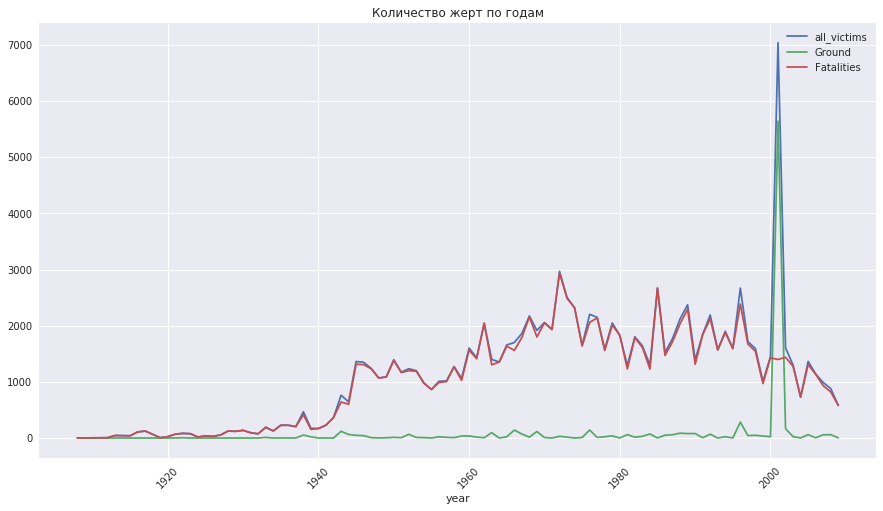

In [69]:
# Нарисуйте график all_victims, Aboard, Fatalities для каждого года
df.groupby('year').sum()[['all_victims', 'Ground', 'Fatalities']].plot(rot=45) #kind='bar'
plt.title('Количество жерт по годам')
plt.show()

In [70]:
# Посчитайте кол-во Инцидентов и жертв по годам. На этот раз используйте .pivot_table()

crashes_by_year = pd.pivot_table(df_full, index='year', values=['Aboard','Fatalities','Ground','all_victims'], aggfunc='sum')
crashes_by_year['count'] =  pd.pivot_table(df_full, index='year', values=['all_victims'], aggfunc='count').values.T[0]
crashes_by_year.tail()

,Aboard,Fatalities,Ground,all_victims,count
year,,,,,
2005,2164.0,1306.0,59.0,1365.0,51
2006,1413.0,1136.0,4.0,1140.0,49
2007,1364.0,931.0,57.0,988.0,54
2008,1463.0,820.0,60.0,880.0,62
2009,891.0,581.0,3.0,580.0,23


In [71]:
# Сколько жертв на инцидент? 
crashes_by_year['victims_on_incident'] = crashes_by_year['all_victims']/crashes_by_year['count']

In [72]:
# существует ли корреляция между всеми праметрами? 
crashes_by_year.corr()

,Aboard,Fatalities,Ground,all_victims,count,victims_on_incident
Aboard,1.000000,0.971557,0.088475,0.809457,0.911233,0.638954
Fatalities,0.971557,1.000000,0.073032,0.822771,0.921589,0.649083
Ground,0.088475,0.073032,1.000000,0.626929,0.092734,0.722433
all_victims,0.809457,0.822771,0.626929,1.000000,0.772748,0.918634
count,0.911233,0.921589,0.092734,0.772748,1.000000,0.550019
victims_on_incident,0.638954,0.649083,0.722433,0.918634,0.550019,1.000000


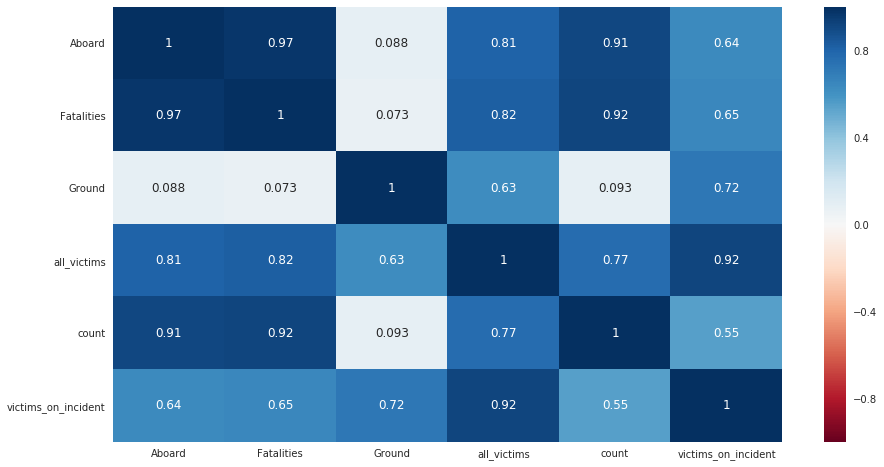

In [73]:
#Отрисуйте heatmap корреляции для более хорошего визульного представления - используйте sns.heatmap() 

sns.heatmap(crashes_by_year.corr(), 
         vmin=-1, vmax=1,annot=True, cmap='RdBu',)
plt.show()

# Бонус! Давайте порисуем еще! 

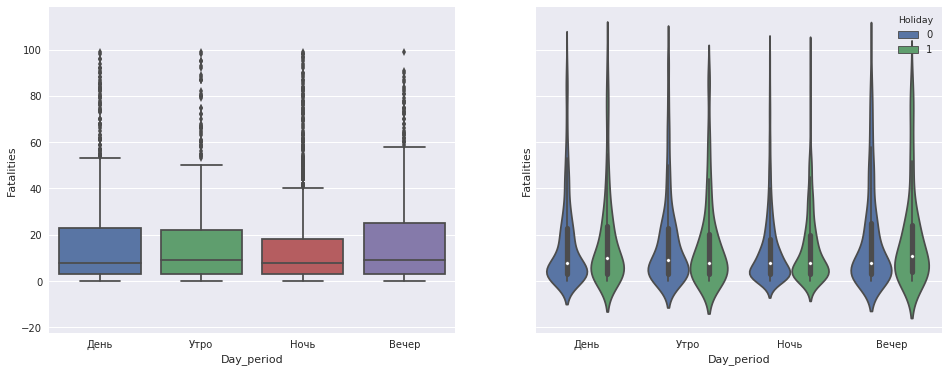

In [74]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.boxplot(x="Day_period", y="Fatalities", data=df_full[df_full['Fatalities'] < 100],  ax=axes[0]);
sns.violinplot(x="Day_period", y="Fatalities", data=df_full[df_full['Fatalities'] < 100], ax=axes[1],
              hue='Holiday');

### Разберём части Boxplot ###

__Черта__ – Медиана  
__Коробка__ – Интерквартильный размах (IQR или разница 25% (Q1) и 75% (Q3) перцентили)   
__Усы__ – Это интервал $\bigl[ Q_1 - 1.5 \times IQR$, $Q_3 + 1.5 \times IQR \bigr]$  
__Точки__ – Выбросы

<img src="../pic/Boxplot.png" width="500">
Подообнее на [Wikipedia]('https://en.wikipedia.org/wiki/Box_plot')

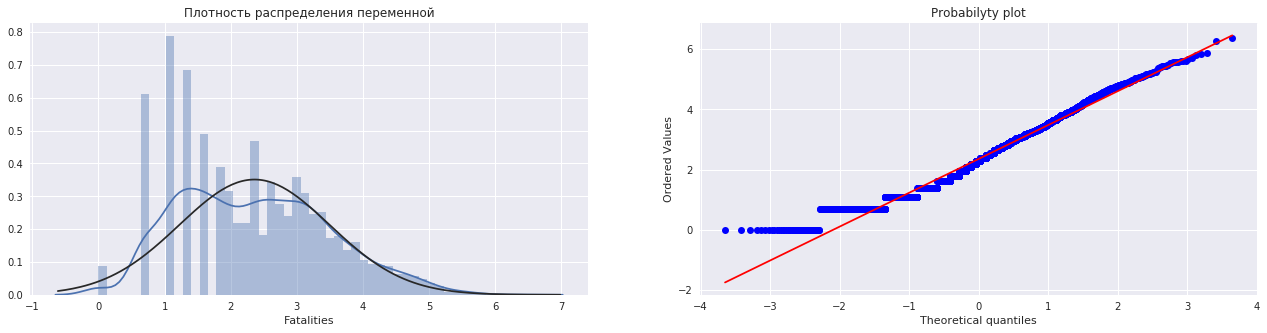

In [78]:
fig = plt.figure(figsize=(22, 5))
ax1 = fig.add_subplot(121)
sns.distplot(df_full['Fatalities'].dropna(), fit=st.norm, kde=True,ax=ax1, bins=50)
ax1.set_title('Плотность распределения переменной')
ax2 = fig.add_subplot(122)
prob = st.probplot(df_full['Fatalities'].dropna()), dist=st.norm, plot=ax2)
ax2.set_title('Probabilyty plot')
plt.show()

### Ссылки:
- Хороший [обзор основных функций Pandas](https://alexanderdyakonov.files.wordpress.com/2015/04/ama2015_pandas.pdf) от Александра Дьяконова (МГУ)
- Открытый курс машинного обучения. [Тема 1. Первичный анализ данных с Pandas](https://habr.com/company/ods/blog/322626/)  
- Подробная [Документация Pandas](http://pandas.pydata.org/pandas-docs/stable/api.html)

### Литература: 
- Heydt Michael. Learning Pandas 